In [7]:
# Importing the libraries
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

import seaborn as sns
sns.set_color_codes()
sns.set(font_scale=1.25)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#C:\Users\ChrisB\Documents\PRINCIPALANALYTICSPREP\ML\HOMEWORK_1\DATASET
# Importing the dataset
dataset = pd.read_csv('C:\\Users\\ChrisB\\Documents\\PRINCIPALANALYTICSPREP\\ML\\HOMEWORK_1\\DATASET\\kc_house_data.csv', delimiter =',')

ModuleNotFoundError: No module named 'pandas.plotting.scatter_matrix'

In [2]:
dataset.head()# Examine the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
dataset.info()# Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


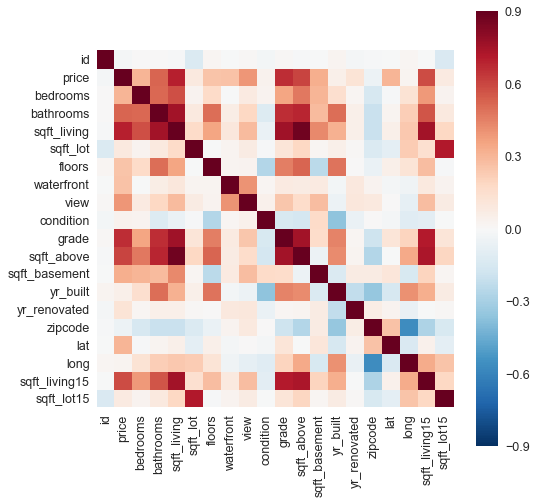

In [5]:


# overall correlation

f, ax = plt.subplots(figsize=(8,8))
_ = sns.heatmap(dataset.corr(), vmax=0.9, square=True)

In [6]:
#Correlation Matrix
dataset.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [3]:
# Removing unimportant variables
columns1 = ["zipcode","id","long","lat","yr_renovated","yr_built","condition","sqft_lot15", "sqft_lot", "date","waterfront","floors"]
dataset3 = dataset.drop(columns1,axis=1)

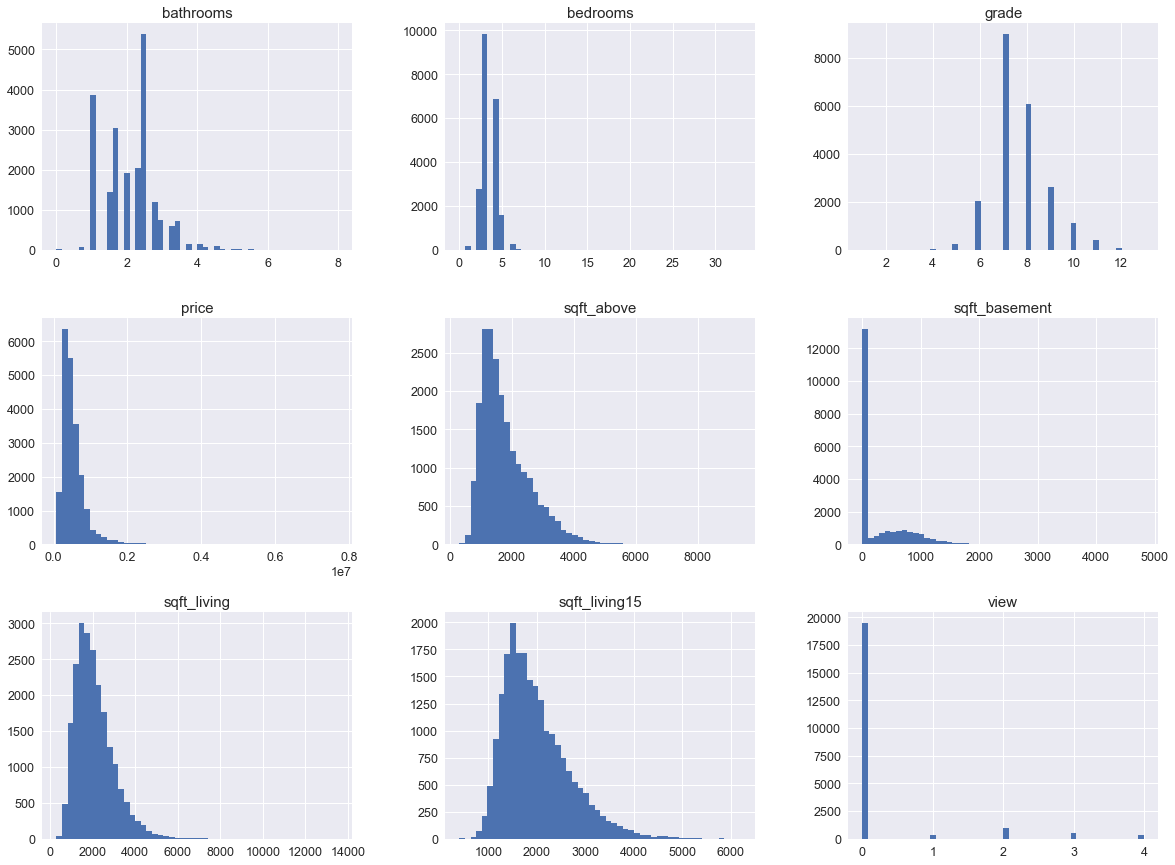

In [8]:
# Exploring new dataset
dataset3.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# Correlation of New Dataset
#Correlation Matrix
dataset3.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350


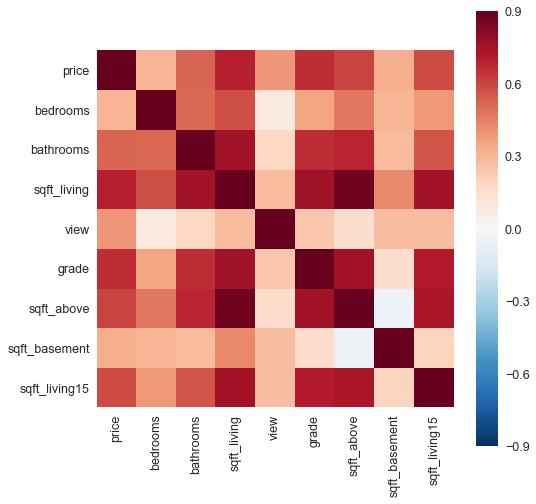

In [10]:
# Correlation of New Dataset
# overall correlation

f, ax = plt.subplots(figsize=(8,8))
_ = sns.heatmap(dataset3.corr(), vmax=0.9, square=True)

In [11]:
# Separating the dataset into predictor matrix and dependent variable vector
X = dataset3.iloc[:, 1:].values
y = dataset3.iloc[:, 0].values

In [12]:
# Encoding categorical data - Views
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [13]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


C:\Users\ChrisB\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating Model Performance
from sklearn.metrics import mean_squared_error
lin_mse_LR = mean_squared_error(y_test, y_pred)
lin_rmse_LR = np.sqrt(lin_mse_LR)
lin_rmse_LR

223606.02830921847

In [17]:
# Decision Tree Modeling

# Fitting Decision Tree Regression Model to the Training set
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = tree_reg.predict(X_test)

# Evaluating Model Decision Tree Performance
from sklearn.metrics import mean_squared_error
lin_mse_DT = mean_squared_error(y_test, y_pred)
lin_rmse_DT = np.sqrt(lin_mse_DT)
lin_rmse_DT

291731.45537066169

In [18]:
#  Random Forest Model

# Fitting a Random Forest  Model to the Training set
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)



# Predicting the Test set results
y_pred = forest_reg.predict(X_test)

# Evaluating Model Random Forest Performance
from sklearn.metrics import mean_squared_error
lin_mse_RF = mean_squared_error(y_test, y_pred)
lin_rmse_RF = np.sqrt(lin_mse_RF)
lin_rmse_RF


222246.09986110686

C:\Users\ChrisB\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026692CFBC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000266979A6CF8>]], dtype=object)

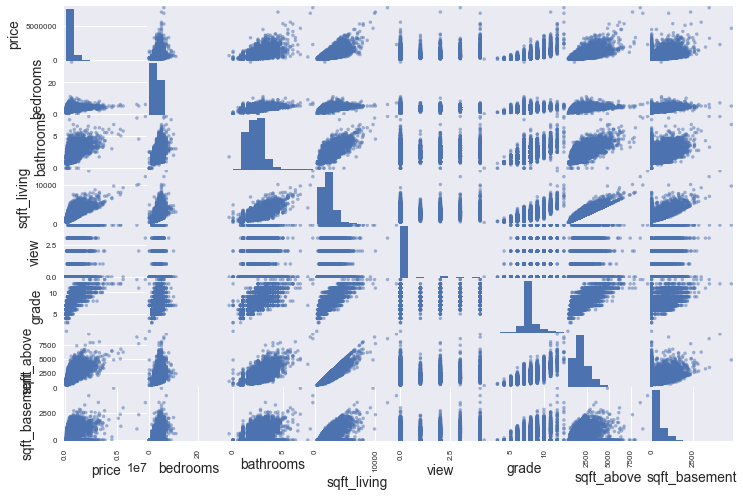

In [4]:
# Scatter matrix

attributes = ["price","bedrooms","bathrooms","sqft_living", "view","grade", "sqft_above","sqft_basement"]

scatter_matrix(dataset3[attributes], figsize=(12,8))

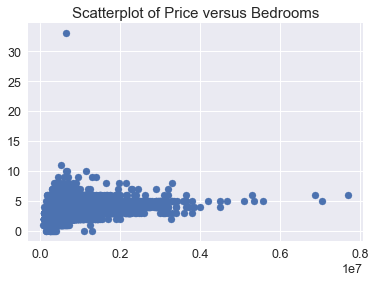

In [8]:
# scatter plots
plt.scatter(dataset3['price'],dataset3['bedrooms'])
plt.title('Scatterplot of %s versus %s' %('Price','Bedrooms'))

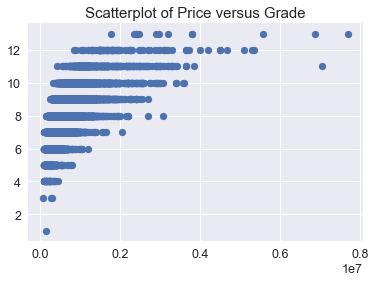

In [9]:
# scatter plots
plt.scatter(dataset3['price'],dataset3['grade'])
plt.title('Scatterplot of %s versus %s' %('Price','Grade'))

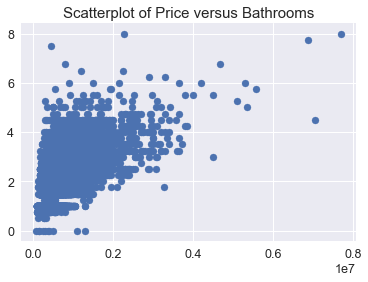

In [11]:
# scatter plots
#attributes = ["price","bedrooms","bathrooms","sqft_living", "view","grade", "sqft_above","sqft_basement"]
plt.scatter(dataset3['price'],dataset3['bathrooms'])
plt.title('Scatterplot of %s versus %s' %('Price','Bathrooms'))

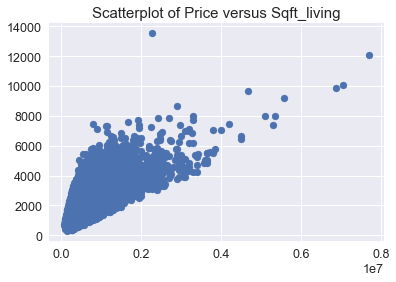

In [12]:
# scatter plots
#attributes = ["price","bedrooms","bathrooms","sqft_living", "view","grade", "sqft_above","sqft_basement"]
plt.scatter(dataset3['price'],dataset3['sqft_living'])
plt.title('Scatterplot of %s versus %s' %('Price','Sqft_living'))

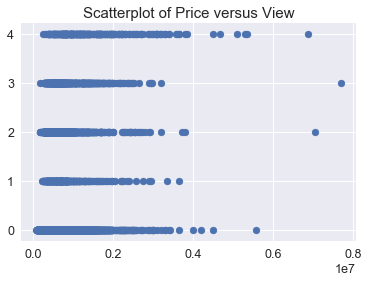

In [13]:
# scatter plots
#attributes = ["price","bedrooms","bathrooms","sqft_living", "view","grade", "sqft_above","sqft_basement"]
plt.scatter(dataset3['price'],dataset3['view'])
plt.title('Scatterplot of %s versus %s' %('Price','View'))

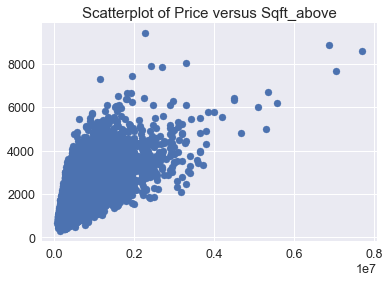

In [14]:

#attributes = ["price","bedrooms","bathrooms","sqft_living", "view","grade", "sqft_above","sqft_basement"]
plt.scatter(dataset3['price'],dataset3['sqft_above'])
plt.title('Scatterplot of %s versus %s' %('Price','Sqft_above'))

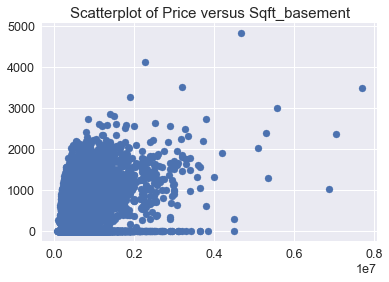

In [15]:

#attributes = ["price","bedrooms","bathrooms","sqft_living", "view","grade", "sqft_above","sqft_basement"]
plt.scatter(dataset3['price'],dataset3['sqft_basement'])
plt.title('Scatterplot of %s versus %s' %('Price','Sqft_basement'))